<a href="https://colab.research.google.com/github/KinamJeong/mygit/blob/master/RANSAC_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def get_sampling_number(sample_size, p=0.99, e=0.5):
    '''
    sample size : Number of sample size per every iterations
    p : Desired probability of choosing at least one sample free of outliers
    e : Estimated probability that a point is an outlier
    '''
    # Calculate the required number of iterations based on the formula
    n_iterations_calculated = math.ceil(math.log(1 - p) / math.log(1 - (1 - e)**sample_size))
    print(f"Calculated number of iterations: {n_iterations_calculated}")
    return n_iterations_calculated

def get_inlier_threshold(thresholds, data, polynomial_degree, sample_size,
                         min_iteration, max_iteration, stop_inlier_ratio, verbose=False):

    early_stop_flag = False
    inlier_threshold = None
    for threshold in thresholds:
        best_fit = None
        best_error = 0
        for i in range(max_iteration):
            # Randomly select sample points
            subset = data[np.random.choice(len(data), sample_size, replace=False)]
            x_sample, y_sample = subset[:, 0], subset[:, 1]

            # Fit a line to the sample points
            p = np.polyfit(x_sample, y_sample, polynomial_degree)

            # Compute error
            y_pred = np.polyval(p, X)
            error = np.abs(y - y_pred)

            # Count inliers
            inliers = error < threshold
            n_inliers = np.sum(inliers)

            # Update best fit if the current model is better
            if n_inliers > best_error:
                print("threshold : {}, index : {}, n_inliers : {}".format(threshold, i, n_inliers))
                best_fit = p
                best_error = n_inliers

                if (i > min_iteration) and (n_inliers/len(data)) >= stop_inlier_ratio:
                    early_stop_flag = True
                    inlier_threshold = threshold

            if early_stop_flag:
                break

        if verbose:
            # Best curve
            y_best = np.polyval(best_fit, X)

            # Plotting
            plt.scatter(X, y, label='Data Points')
            plt.plot(X, y_best, color='red', label='RANSAC Fit')
            plt.legend()
            plt.show()

        if early_stop_flag:
            break

    return inlier_threshold

def get_model_with_ransac(data, polynomial_degree, threshold, sample_size,
                         min_iteration, max_iteration, stop_inlier_ratio, verbose=False):

    early_stop_flag = False
    inlier_threshold = None
    best_fit = None
    best_error = 0
    for i in range(max_iteration):
        # Randomly select sample points
        subset = data[np.random.choice(len(data), sample_size, replace=False)]
        x_sample, y_sample = subset[:, 0], subset[:, 1]

        # Fit a line to the sample points
        p = np.polyfit(x_sample, y_sample, polynomial_degree)

        # Compute error
        y_pred = np.polyval(p, X)
        error = np.abs(y - y_pred)

        # Count inliers
        inliers = error < threshold
        n_inliers = np.sum(inliers)

        # Update best fit if the current model is better
        if n_inliers > best_error:
            best_fit = p
            best_error = n_inliers

            if (i > min_iteration) and (n_inliers/len(data)) >= stop_inlier_ratio:
                early_stop_flag = True
                inlier_threshold = threshold
                print("index : {}, n_inliers : {}".format(i, n_inliers))

        if early_stop_flag:
            break

    if verbose:
        # Best curve
        y_best = np.polyval(best_fit, X)

        # Plotting
        plt.scatter(X, y, label='Data Points')
        plt.plot(X, y_best, color='red', label='RANSAC Fit')
        plt.legend()
        plt.show()

    return early_stop_flag, best_fit

Calculated number of iterations: 17
threshold : 1, index : 0, n_inliers : 16
threshold : 1, index : 10, n_inliers : 21


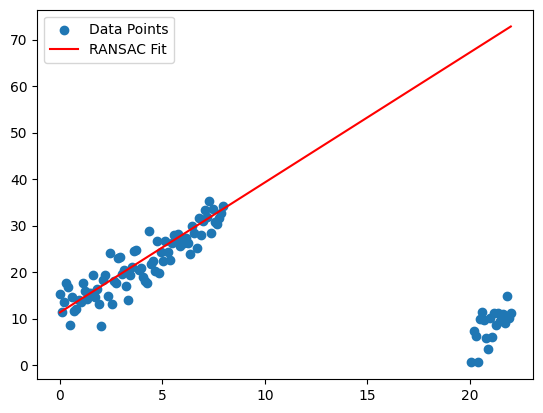

threshold : 2, index : 0, n_inliers : 16
threshold : 2, index : 1, n_inliers : 18
threshold : 2, index : 2, n_inliers : 29
threshold : 2, index : 4, n_inliers : 35
threshold : 2, index : 9, n_inliers : 40


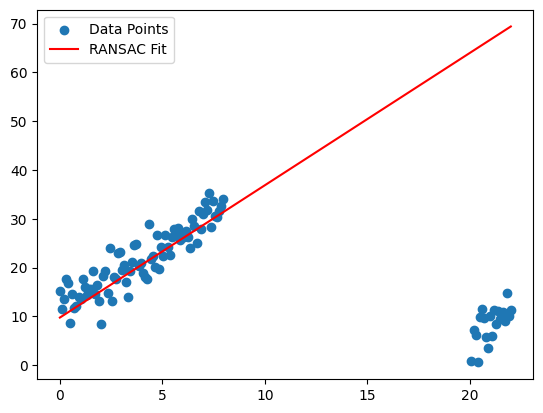

threshold : 4, index : 0, n_inliers : 2
threshold : 4, index : 1, n_inliers : 41
threshold : 4, index : 3, n_inliers : 43
threshold : 4, index : 4, n_inliers : 63


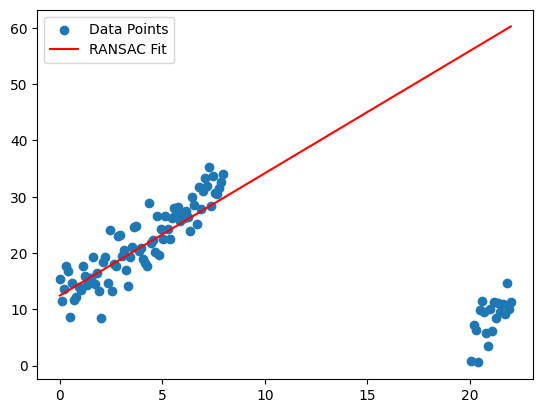

In [2]:
# Generate synthetic data
np.random.seed(0)
n_points = 100
X = np.linspace(0, 10, n_points)
y = 3 * X + 10 + np.random.normal(0, 3, n_points)

# Add outliers
n_outliers = 20
X[-n_outliers:] += int(30 * np.random.rand())
y[-n_outliers:] -= int(50 * np.random.rand())
X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)
data = np.hstack([X, y])

threshold_cadidates = [1,2,4,8,16,32,64,128]
threshold_cadidates.sort()

sample_size = 2
max_iteration = get_sampling_number(sample_size)
threshold = get_inlier_threshold(
    threshold_cadidates, data, polynomial_degree=1, sample_size=sample_size,
    min_iteration=-1, max_iteration=max_iteration, stop_inlier_ratio=0.50, verbose=True)

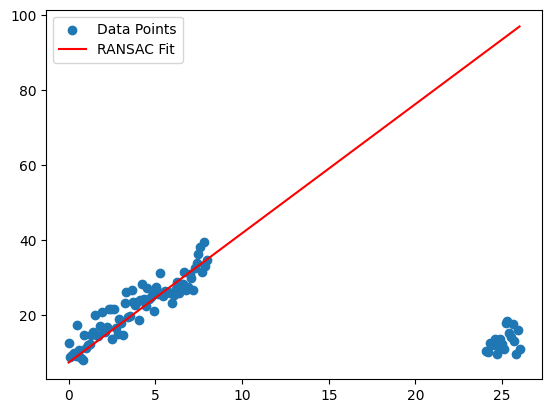

In [3]:
np.random.seed(np.random.seed())
n_points = 100
X = np.linspace(0, 10, n_points)
y = 3 * X + 10 + np.random.normal(0, 3, n_points)

# Add outliers
n_outliers = 20
X[-n_outliers:] += int(30 * np.random.rand())
y[-n_outliers:] -= int(50 * np.random.rand())
X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)
data = np.hstack([X, y])

success, param = get_model_with_ransac(data, polynomial_degree=1, threshold=threshold, sample_size=sample_size,
    min_iteration=-1, max_iteration=max_iteration, stop_inlier_ratio=0.75, verbose=True)

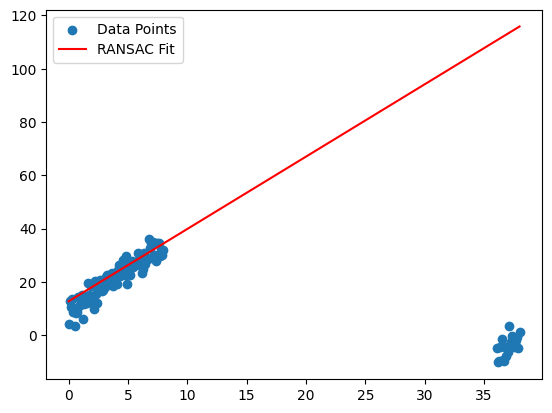

In [4]:
# Generate synthetic data
np.random.seed(np.random.seed())
n_points = 100
X = np.linspace(0, 10, n_points)
y = 3 * X + 10 + np.random.normal(0, 3, n_points)

# Add outliers
n_outliers = 20
X[-n_outliers:] += int(30 * np.random.rand())
y[-n_outliers:] -= int(50 * np.random.rand())
X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)
data = np.hstack([X, y])

success, param = get_model_with_ransac(data, polynomial_degree=1, threshold=threshold, sample_size=sample_size,
    min_iteration=-1, max_iteration=max_iteration, stop_inlier_ratio=0.75, verbose=True)